In [2]:
# -*- coding: utf-8 -*-
"""
Created on Thu Nov  2 23:53:45 2017

@author: yuchen
"""


# coding: utf-8

# In[ ]:


import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import numpy as np
from IPython.core.debugger import Pdb
get_ipython().magic('matplotlib inline')

In [3]:
image2 = mpimg.imread('test_images/solidWhiteRight.jpg')

#plt.imshow(image)
#image2 =cv2.imread('test_images/solidWhiteRight.jpg',-1)  # 1,0,-1: color,greyscale, unchanged
#image3 =cv2.IMREAD_GRAYSCALE('test_images/solidWhiteRight.jpg')

print('This image is ', type(image2),'with dimensions:',image2.shape)

#cv2.startWindowThread()


#-----------------highlight: waitKey only works for cv.imshow(at least one highGUI)
#cv2.imshow('thisistitle',image2)
#cv2.waitKey(0)

#-----------------highlight: to show img using plt show in the terminal, have to add below
#plt.show()


#cv2.destroyAllWindows()
#plt.imshow(image2)
#cv2.waitKey(0)
#cv2.destroyALLWindows()
#cv2.destoryWindow(<title>)
# argument is the time in ms. The function waits for specified ms for any keyboard event. 
#If you press any key in that time, the program continues. If 0 is passed, it waits indefinitely for a key stroke.




# In[ ]:



#cv2.inRange() for color selection
#cv2.fillPoly() for regions selection
#cv2.line() to draw lines on an image given endpoints
#cv2.addWeighted() to coadd / overlay two images cv2.cvtColor() to grayscale or change color cv2.imwrite() to output images to file
#cv2.bitwise_and() to apply a mask to an image

This image is  <class 'numpy.ndarray'> with dimensions: (540, 960, 3)


In [4]:
import math

def grayscale(img):
# grayscale transform
# call plt.imshow(gray, cmap='gray') to see
    return cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
# if using cv2.imread() to read a img, use BGR2GRAY

def canny(img,low_thresh,high_thresh):
    return cv2.Canny(img,low_thresh,high_thresh)

def gaussian_blur(image,kernel_size):
    return cv2.GaussianBlur(image,(kernel_size,kernel_size),0)

def region_of_interest(img, vertices):
    # only keep image region defined by vertices, rest set to black
    mask = np.zeros_like(img)  # define a blank mask to start
    if len(img.shape)>2:   # define a 3 channel or 1 channel color to fill the mask
        channel_count = img.shape[2]  # 3 or 4 depending on my image
        ignore_mask_color=(255,)*channel_count
    else:
        ignore_mask_color=255
        
        
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    #fill pixels inside the polygon define by vertices 
    # (img, pts, color[, lineType[, shift[, offset]]]) 
    #pts: array of polygons, each polygon repd by points
    
    
    # return the image only where mask pixels are nonzero
    masked_image = cv2.bitwise_and(img,mask) 
    return masked_image
    
    
def draw_lines(img, lines, color=[255,0,0], thickness=2):
    for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line(img,(x1,y1),(x2,y2),color,thickness)
            

def hough_lines(img, rho, theta, threshold, min_line_len, max_line_gap):
    # input is output of canny, output is image with hough lines drawn
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]),minLineLength=min_line_len,maxLineGap=max_line_gap)
    line_img =np.zeros((img.shape[0],image.shape[1],3), dtype=np.uint8)
    draw_lines(line_img,lines)
    return line_img


def weighted_img(img, initial_img, α=0.8, β=1., λ=0.):
    # input is output of hough_lines(), all black with lines
    #inital_img is raw
    #result =  initial_img * α + img * β + λ
    return cv2.addWeighted(initial_img, α, img, β, λ)
    
def foo(s1):
    return "%s'" % s1            
            
            




solidYellowCurve2.jpg
solidYellowCurve.jpg
whiteCarLaneSwitch.jpg
solidYellowLeft.jpg
solidWhiteCurve.jpg
solidWhiteRight.jpg


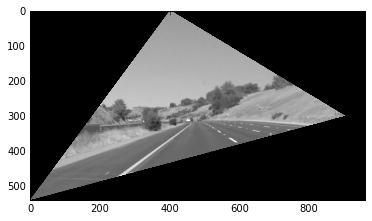

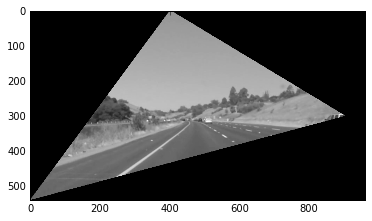

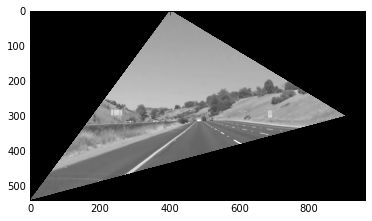

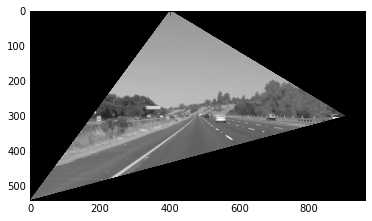

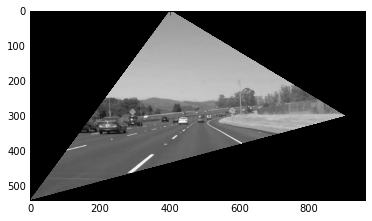

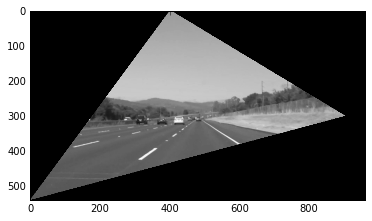

In [12]:
import os
os.listdir("test_images/")  #list all the images

imglist=os.listdir('test_images/')
#print(imglist)

for eachimg in imglist:
    #cv2.startWindowThread()    
    #cv2.waitKey(0)
#---------------highlight: how to debug! see cheatsheet for inputs in box
#http://frid.github.io/blog/2014/06/05/python-ipdb-cheatsheet/

  
    
    image=mpimg.imread('test_images/'+eachimg)
    grayed_img=grayscale(image)
    plt.figure()
    
    print(eachimg)
    
    #Pdb().set_trace()

    blurred_img=gaussian_blur(grayed_img,3)
    
    cannyed_img=canny(blurred_img,100,200)
    
    left_bot = [0, 539]
    right_bot = [900, 300]
    apex = [400, 0]


#------------------------highlight, findpoly input
    vertices = np.array([[left_bot, right_bot, apex]])
    
    regioned_img=region_of_interest(blurred_img,vertices)
    plt.imshow(regioned_img,cmap='gray')

    
    
 #   greyedimg=grayscale()